# Introduction to Array and Dynamic Array

###  Introduction to Array

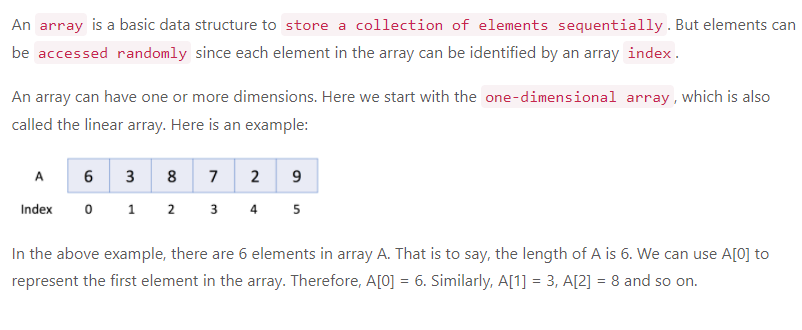

#### Operations in Array

```cpp
    #include <iostream>

    int main() {
        // 1. Initialize
        int a0[5];
        int a1[5] = {1, 2, 3};  // other element will be set as the default value
        // 2. Get Length
        int size = sizeof(a1) / sizeof(*a1);
        cout << "The size of a1 is: " << size << endl;
        // 3. Access Element
        cout << "The first element is: " << a1[0] << endl;
        // 4. Iterate all Elements
        cout << "[Version 1] The contents of a1 are:";
        for (int i = 0; i < size; ++i) {
            cout << " " << a1[i];
        }
        cout << endl;
        cout << "[Version 2] The contents of a1 are:";
        for (int& item: a1) {
            cout << " " << item;
        }
        cout << endl;
        // 5. Modify Element
        a1[0] = 4;
        // 6. Sort
        sort(a1, a1 + size);
    }

```

### Introduction to Dynamic Array

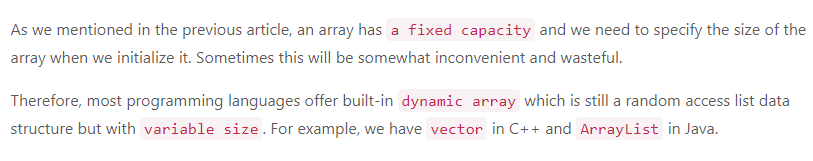

#### Operations in Dynamic Array

```cpp
#include <iostream>

int main() {
    // 1. initialize
    vector<int> v0;
    vector<int> v1(5, 0);
    // 2. make a copy
    vector<int> v2(v1.begin(), v1.end());
    vector<int> v3(v2);
    // 2. cast an array to a vector
    int a[5] = {0, 1, 2, 3, 4};
    vector<int> v4(a, *(&a + 1));
    // 3. get length
    cout << "The size of v4 is: " << v4.size() << endl;
    // 4. access element
    cout << "The first element in v4 is: " << v4[0] << endl;
    // 5. iterate the vector
    cout << "[Version 1] The contents of v4 are:";
    for (int i = 0; i < v4.size(); ++i) {
        cout << " " << v4[i];
    }
    cout << endl;
    cout << "[Version 2] The contents of v4 are:";
    for (int& item : v4) {
        cout << " " << item;
    }
    cout << endl;
    cout << "[Version 3] The contents of v4 are:";
    for (auto item = v4.begin(); item != v4.end(); ++item) {
        cout << " " << *item;
    }
    cout << endl;
    // 6. modify element
    v4[0] = 5;
    // 7. sort
    sort(v4.begin(), v4.end());
    // 8. add new element at the end of the vector
    v4.push_back(-1);
    // 9. delete the last element
    v4.pop_back();
}

```

## Problems:

### Find Pivot Index
https://leetcode.com/explore/learn/card/array-and-string/201/introduction-to-array/1144/

Given an array of integers nums, calculate the pivot index of this array.

The pivot index is the index where the sum of all the numbers strictly to the left of the index is equal to the sum of all the numbers strictly to the index's right.

If the index is on the left edge of the array, then the left sum is 0 because there are no elements to the left. This also applies to the right edge of the array.

Return the leftmost pivot index. If no such index exists, return -1.

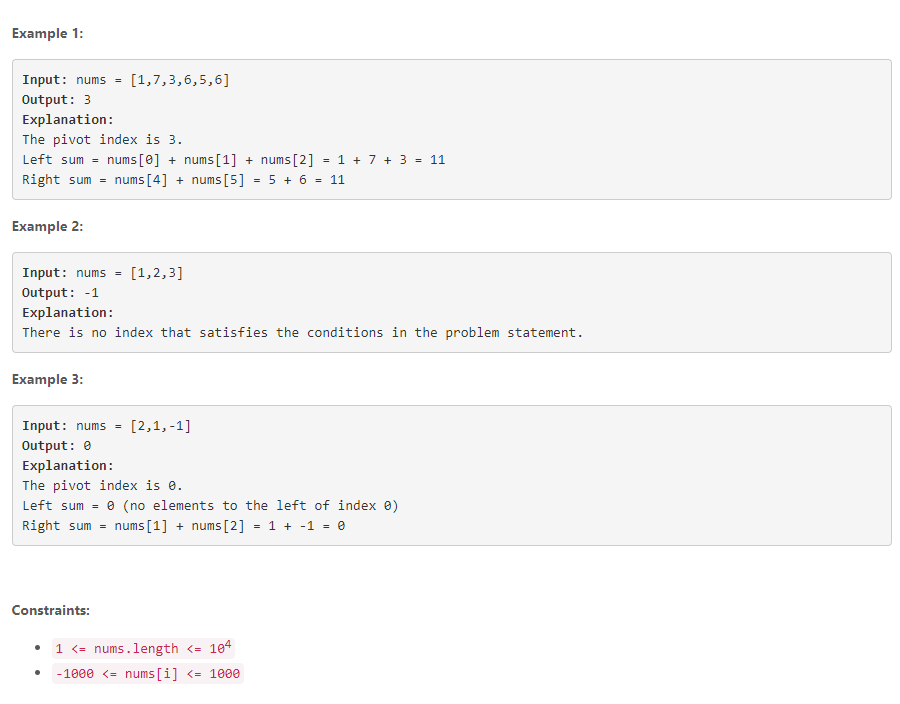

##### Accepted v1
```cpp
class Solution {
public:
    int pivotIndex(vector<int>& nums) {
        if(nums.size()==0){
            return -1;
        }
        
        vector<int> left2rightSum(nums.size());
        vector<int> right2leftSum(nums.size());
        
        left2rightSum[0] = nums[0];
        right2leftSum[nums.size()-1] = nums[nums.size()-1];
        
        for(int i=1;i<nums.size();i++){
            left2rightSum[i] = nums[i] + left2rightSum[i-1];
        }
        
        for(int i=nums.size()-2;i>=0;i--){
            right2leftSum[i] = nums[i] + right2leftSum[i+1];
        }
        
        for(int i=0;i<nums.size();i++){
            if(left2rightSum[i]==right2leftSum[i]){
                return i;
            }
        }
        return -1;
    }
};
```

### Solutions 

https://leetcode.com/problems/find-pivot-index/solution/

#####  Approach #1: Prefix Sum [Accepted]
```java
class Solution {
    public int pivotIndex(int[] nums) {
        int sum = 0, leftsum = 0;
        for (int x: nums) sum += x;
        for (int i = 0; i < nums.length; ++i) {
            if (leftsum == sum - leftsum - nums[i]) return i;
            leftsum += nums[i];
        }
        return -1;
    }
}
```

###  Largest Number At Least Twice of Others
https://leetcode.com/explore/learn/card/array-and-string/201/introduction-to-array/1147/

You are given an integer array nums where the largest integer is unique.

Determine whether the largest element in the array is at least twice as much as every other number in the array. If it is, return the index of the largest element, or return -1 otherwise.

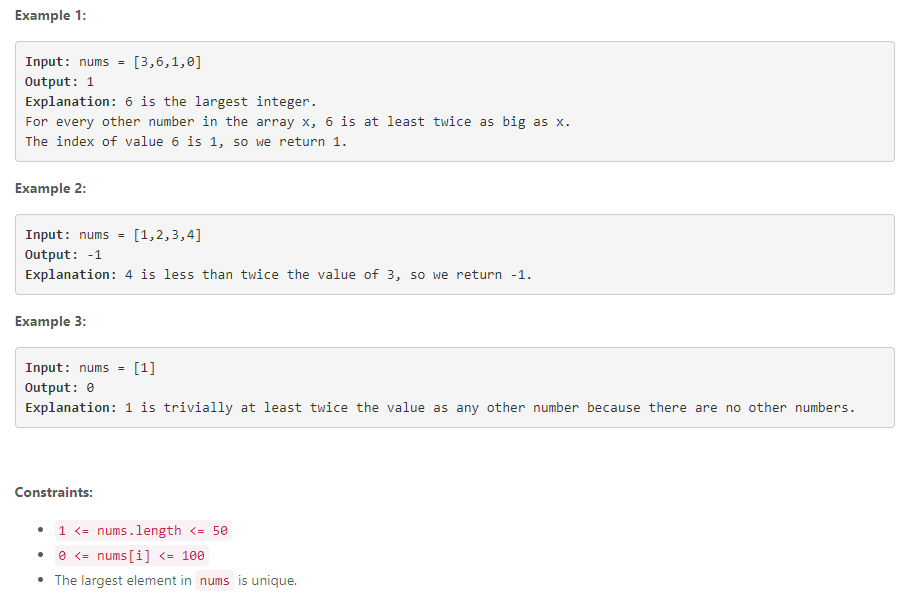

##### Accepted v1 Sort
```cpp
class Solution {
public:
    
    
    void swap(int* a, int* b)  {  
        int t = *a;  
        *a = *b;  
        *b = t;  
    }  


    int partition (vector<int>& arr, int low, int high)  
    {  
        int pivot = arr[high];  
        int i = (low - 1);  

        for (int j = low; j <= high - 1; j++)  
        {  

            if (arr[j] < pivot)  
            {  
                i++;  
                swap(&arr[i], &arr[j]);  
            }  
        }  
        swap(&arr[i + 1], &arr[high]);  
        return (i + 1);  
    }  


    void quickSort(vector<int>& arr, int low, int high)  
    {  
        if (low < high)  
        {  

            int pi = partition(arr, low, high);  

            quickSort(arr, low, pi - 1);  
            quickSort(arr, pi + 1, high);  
        }  
    }  
    
    
    
    int dominantIndex(vector<int>& nums) {
        if(nums.size()==0){
            return -1;
        }
        if(nums.size()==1){
            return 0;
        }
        
        map<int,int> mymap;
        for(int i=0;i<nums.size();i++){
            mymap[nums[i]] = i;
        }
        
        
        quickSort(nums,0,nums.size()-1);
        
        if(nums[nums.size()-1]>= 2*nums[nums.size()-2]){            
            return mymap[nums[nums.size()-1]];
        }else{
            return -1;
        }
        
        
        
    }
};
```


### Plus One

https://leetcode.com/explore/learn/card/array-and-string/201/introduction-to-array/1148/

You are given a large integer represented as an integer array digits, where each digits[i] is the ith digit of the integer. The digits are ordered from most significant to least significant in left-to-right order. The large integer does not contain any leading 0's.

Increment the large integer by one and return the resulting array of digits.

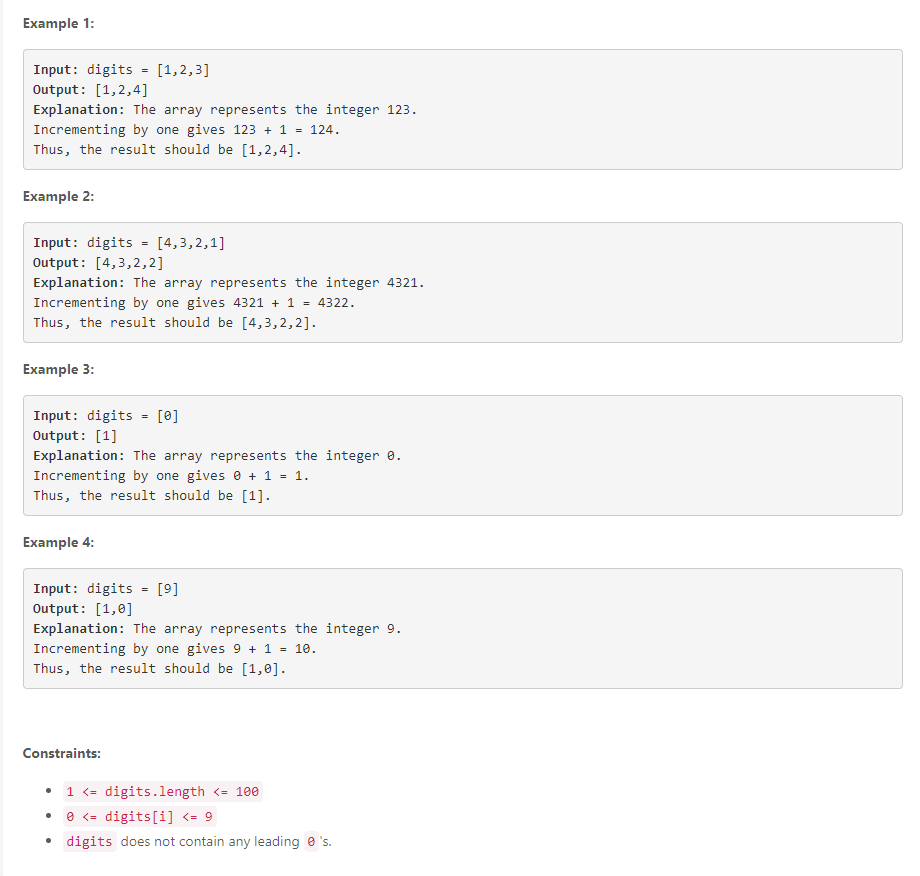

##### Failed v1 Integer overflow
```cpp
class Solution {
public:
    vector<int> plusOne(vector<int>& digits) {
        
        // Compress
        int num = 0;
        int multiple = 1;
        for(int i=digits.size()-1;i>=0;i--){
            num += digits[i] * multiple;
            multiple *= 10;
        }
        num += 1;
        cout<<num<<" num\n";
        cout<<multiple<<" multiple\n";
        
        if(num/multiple==0){
            multiple/=10;
        }
        
        // Decompress
        vector<int> new_digits;
        while(multiple!=0){
            new_digits.push_back(num/multiple);
            num = num%multiple;
            multiple /= 10;
        }

        return new_digits;
    }
};

```

##### Accepted v2
```cpp
class Solution {
public:
    vector<int> plusOne(vector<int>& digits) {
        
        vector<int> reverse_digits;
        int step_in = 1;
        // Compress
        for(int i=digits.size()-1;i>=0;i--){
            int cur = digits[i]+step_in;
            if(cur==10){
                reverse_digits.push_back(0);
                step_in = 1;
            }else{
                reverse_digits.push_back(cur);
                step_in = 0;
            }
        }
        
        if(step_in==1){
            reverse_digits.push_back(1);
        }
        
        // for( auto x: reverse_digits){
        //     cout<<x<<" x\n";
        // }
        
        vector<int> new_digits;
        for(int i=reverse_digits.size()-1;i>=0;i--){
            new_digits.push_back(reverse_digits[i]);
        }
        
        
        return new_digits;
    }
        
        
};
```

### Solutions
https://leetcode.com/problems/plus-one/solution/

##### Approach 1: Schoolbook Addition with Carry
```java
class Solution {
  public int[] plusOne(int[] digits) {
    int n = digits.length;

    // move along the input array starting from the end
    for (int idx = n - 1; idx >= 0; --idx) {
      // set all the nines at the end of array to zeros
      if (digits[idx] == 9) {
        digits[idx] = 0;
      }
      // here we have the rightmost not-nine
      else {
        // increase this rightmost not-nine by 1
        digits[idx]++;
        // and the job is done
        return digits;
      }
    }
    // we're here because all the digits are nines
    digits = new int[n + 1];
    digits[0] = 1;
    return digits;
  }
}
```

## Diagonal Traverse

https://leetcode.com/explore/learn/card/array-and-string/202/introduction-to-2d-array/1167/

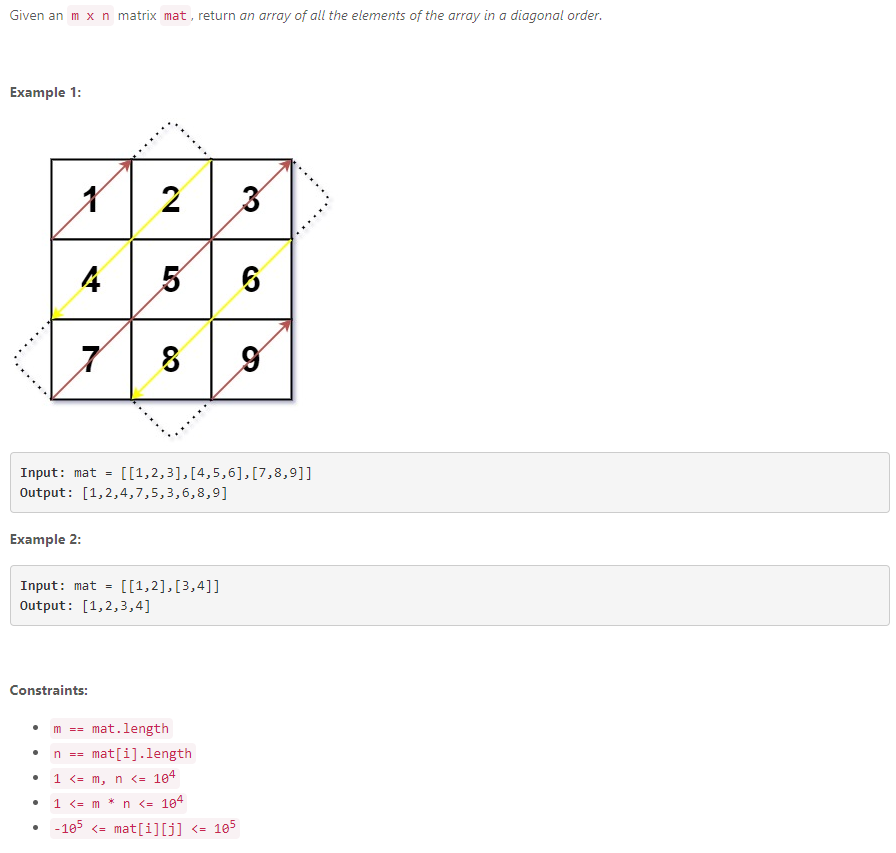

##### Failed v1

```cpp
class Solution {
public:
    vector<int> findDiagonalOrder(vector<vector<int>>& mat) {
        vector<int> output;
        int i=0;
        int j=1;
        output.push_back(mat[0][0]);
        string direction;
        
        while(j<mat[0].size()){
            cout<<i<<" i  "<<j<<" j\n";
            
            output.push_back(mat[i][j]);
            if(i==0){
                direction = "right2left";
            }
            
            if(j==0){
                direction = "left2right";
                i++;
                output.push_back(mat[i][j]);
            }
            
            
            
            if(direction=="right2left"){
                i++;
                j--;
            }else{
                i--;
                j++;
            }
            
        }
        return output;
        
    }
};

```